# Tennis ATP match predictions
Final project for Bootcamp Data Science organized by Sages (2020)

### Contents
1. Abstract and goals
2. Dataset
3. Download libraries
4. Data exploration, visualisation and preparation for modelling
5. Match prediction
6. Summary

### 1. Abstract

The aim of this project is to examine whether, based on the available statistics of tennis matches of ATP rank, it is possible to make regular profits by betting on results. n this project the effectiveness of the models will be compared with the effectiveness of the predictions resulting from the odds set by the two bookmakers Bet365 and Pinnacle.

### 2. Dataset

All data are from http://tennis-data.co.uk/alldata.php

These datasets contain all tennis matches results from ATP tournaments from 2005 to 2020.

### 3. Download libraries

In [161]:
import numpy as np
import pandas as pd
import re

from utils import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

### 4. Data exploration, visualisation and preparation for modelling

Let's make the table more visible

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Loading dataset

In [6]:
dataset = read_datasets()

Quick view at data

In [7]:
dataset.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result
0,1,Adelaide,Next Generation Hardcourts,2005-01-03,International,Outdoor,Hard,1st Round,3,Saulnier C.,Baccanello P.,53.0,324.0,NaN,NaN,6.0,2.0,7,6,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,1.286,3.250,1.305,3.780,1.0
1,1,Adelaide,Next Generation Hardcourts,2005-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,Sluiter R.,72.0,82.0,NaN,NaN,6.0,3.0,6,1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,1.833,1.833,1.990,1.840,1.0
2,1,Adelaide,Next Generation Hardcourts,2005-01-03,International,Outdoor,Hard,1st Round,3,Melzer J.,Berdych T.,39.0,45.0,NaN,NaN,6.0,4.0,4,6,7,6,NaN,NaN,NaN,NaN,2.0,1,Completed,1.800,1.909,1.901,1.917,1.0
3,1,Adelaide,Next Generation Hardcourts,2005-01-03,International,Outdoor,Hard,1st Round,3,Rochus O.,Dupuis A.,66.0,79.0,NaN,NaN,6.0,3.0,3,6,6,1,NaN,NaN,NaN,NaN,2.0,1,Completed,1.667,2.100,1.621,2.410,1.0
4,1,Adelaide,Next Generation Hardcourts,2005-01-03,International,Outdoor,Hard,1st Round,3,Mayer F.,Arthurs W.,35.0,101.0,NaN,NaN,6.0,4.0,3,6,7,5,NaN,NaN,NaN,NaN,2.0,1,Completed,1.615,2.200,1.787,2.070,1.0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40942 entries, 0 to 40941
Data columns (total 33 columns):
ATP           40942 non-null int64
Location      40942 non-null object
Tournament    40942 non-null object
Date          40942 non-null object
Series        40942 non-null object
Court         40942 non-null object
Surface       40942 non-null object
Round         40942 non-null object
Best of       40942 non-null int64
Player A      40942 non-null object
Player B      40942 non-null object
ARank         40893 non-null float64
BRank         40884 non-null float64
APts          39221 non-null float64
BPts          39210 non-null float64
A1            40704 non-null float64
B1            40704 non-null float64
A2            40310 non-null object
B2            40311 non-null object
A3            19111 non-null object
B3            19111 non-null object
A4            3707 non-null float64
B4            3707 non-null float64
A5            1407 non-null float64
B5            1407 non-

Lets see how many null values are in our dataset

In [9]:
dataset.isnull().sum()

ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Player A          0
Player B          0
ARank            49
BRank            58
APts           1721
BPts           1732
A1              238
B1              238
A2              632
B2              631
A3            21831
B3            21831
A4            37235
B4            37235
A5            39535
B5            39535
Asets           235
Bsets           234
Comment           0
B365A           539
B365B           540
PSA             488
PSB             488
Result            0
dtype: int64

#### Date
Date of match

The date variable is unnecessary, so we can remove it

In [10]:
dataset.drop('Date', inplace=True, axis=1)

## Categorical data

#### ATP
Tournament number

In [11]:
np.unique(dataset.ATP)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
      dtype=int64)

In [12]:
dataset[dataset.ATP == 54]

,ATP,Location,Tournament,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result
2443,54,Bangkok,Thailand Open,International,Indoor,Hard,1st Round,3,Fruttero J.P.,Garcia-Lopez G.,205.0,86.0,185.0,460.0,6.0,3.0,3,6,6,7,NaN,NaN,NaN,NaN,1.0,2,Completed,NaN,NaN,NaN,NaN,0.0
2444,54,Bangkok,Thailand Open,International,Indoor,Hard,1st Round,3,Norman D.,Thomann N.,113.0,285.0,380.0,122.0,4.0,6.0,6,7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,Completed,NaN,NaN,2.010,1.901,0.0
2445,54,Bangkok,Thailand Open,International,Indoor,Hard,1st Round,3,Karanusic R.,Gremelmayr D.,156.0,239.0,264.0,149.0,2.0,6.0,5,7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,Completed,NaN,NaN,2.320,1.704,0.0
2446,54,Bangkok,Thailand Open,International,Indoor,Hard,1st Round,3,Kim K.,Wang Y.T.,79.0,102.0,481.0,410.0,3.0,6.0,6,7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,Completed,1.90,1.800,2.180,1.781,0.0
2447,54,Bangkok,Thailand Open,International,Indoor,Hard,1st Round,3,Soderling R.,Vik R.,41.0,71.0,865.0,496.0,4.0,6.0,6,1,6,2,NaN,NaN,NaN,NaN,2.0,1,Completed,1.28,3.250,1.356,3.610,1.0
2448,54,Bangkok,Thailand Open,International,Indoor,Hard,1st Round,3,Udomchoke D.,Ginepri R.,144.0,21.0,295.0,1240.0,6.0,4.0,3,6,1,6,NaN,NaN,NaN,NaN,1.0,2,Completed,5.50,1.120,7.150,1.148,0.0
2449,54,Bangkok,Thailand Open,International,Indoor,Hard,1st Round,3,Kucera K.,Nieminen J.,146.0,42.0,292.0,852.0,1.0,6.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,Retired,3.25,1.280,3.970,1.306,0.0
2450,54,Bangkok,Thailand Open,International,Indoor,Hard,1st Round,3,Murray A.,Bastl G.,109.0,124.0,396.0,344.0,6.0,2.0,6,4,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,1.28,3.250,1.383,3.410,1.0
2451,54,Bangkok,Thailand Open,International,Indoor,Hard,1st Round,3,Chen T.,Srichaphan P.,282.0,57.0,123.0,700.0,3.0,6.0,4,6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,Completed,NaN,NaN,NaN,NaN,0.0
2452,54,Bangkok,Thailand Open,International,Indoor,Hard,1st Round,3,Philippoussis M.,Muller G.,203.0,66.0,188.0,558.0,6.0,7.0,6,2,5,7,NaN,NaN,NaN,NaN,1.0,2,Completed,2.75,1.390,3.100,1.435,0.0


This variable only tells us which tournament it is in a specific year. As we can see, not every year the same number is connected with same tournament, so this variable does not contribute anything to our prediction model. Let's remove it.

In [13]:
dataset.drop('ATP', inplace=True, axis=1)

#### Location
Venue of tournament

In [14]:
dataset.Location.value_counts()

Paris               2610
London              2070
Melbourne           2032
New York            1986
Miami               1425
Indian Wells        1425
Rome                 841
Cincinnati           841
Monte Carlo          841
Madrid               793
Barcelona            769
Queens Club          705
Washington           673
Shanghai             665
Hamburg              657
Tokyo                529
Rotterdam            496
Acapulco             496
Delray Beach         496
Dubai                496
Doha                 492
Buenos Aires         472
Basel                465
Beijing              461
Stuttgart            457
Halle                453
Marseille            452
Auckland             448
Montreal             448
Kitzbuhel            446
Newport              445
Vienna               445
's-Hertogenbosch     441
Munich               433
Stockholm            425
Moscow               425
Gstaad               425
Houston              425
Winston-Salem        423
Umag                 421


In [15]:
len(np.unique(dataset.Location))

102

This variable contains 102 unique values. Perhaps a division of locations into continents would give more information due to e.g. weather conditions. We won't need this variable for our purposes, so we'll remove it.

In [16]:
dataset.drop('Location', inplace=True, axis=1)

#### Tournament
Name of tounament (including sponsor if relevant)

In [17]:
len(np.unique(dataset.Tournament))

174

In [18]:
dataset.Tournament.value_counts()

Australian Open                                 2032
French Open                                     1905
US Open                                         1905
Wimbledon                                       1905
Sony Ericsson Open                              1235
BNP Paribas Open                                1045
Monte Carlo Masters                              841
Western & Southern Financial Group Masters       841
Rogers Masters                                   770
Internazionali BNL d'Italia                      715
Shanghai Masters                                 605
BNP Paribas Masters                              517
Abierto Mexicano                                 496
ABN AMRO World Tennis Tournament                 496
Qatar Exxon Mobil Open                           492
Dubai Tennis Championships                       465
China Open                                       461
Mercedes Cup                                     457
AEGON Championships                           

We expect that more information will flow from the rank of the tournament, which is contained in the 'Series' column, so we can remove this variable.

In [19]:
dataset.drop('Tournament', inplace=True, axis=1)

#### Series
Name of ATP tennis series

In [20]:
dataset.Series.value_counts()

ATP250                12810
Grand Slam             7747
Masters 1000           6229
International          5269
ATP500                 4692
Masters                2316
International Gold     1654
Masters Cup             225
Name: Series, dtype: int64

#### Court
Type of court

In [21]:
dataset.Court.value_counts()

Outdoor    33583
Indoor      7359
Name: Court, dtype: int64

In [22]:
dataset.Court.value_counts(normalize = True).round(2)

Outdoor    0.82
Indoor     0.18
Name: Court, dtype: float64

#### Surface
Type of surface

In [23]:
dataset.Surface.value_counts()

Hard      22485
Clay      12980
Grass      4638
Carpet      839
Name: Surface, dtype: int64

In [24]:
dataset.Surface.value_counts(normalize = True).round(2)

Hard      0.55
Clay      0.32
Grass     0.11
Carpet    0.02
Name: Surface, dtype: float64

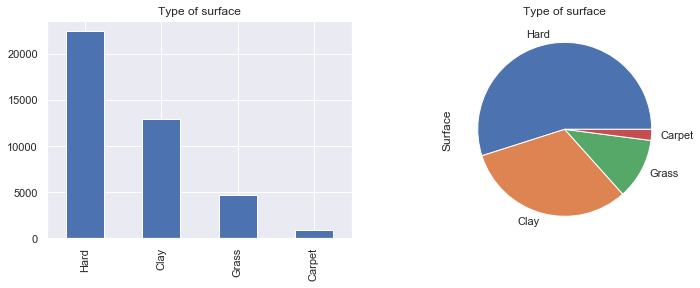

In [25]:
f,ax=plt.subplots(1,2, figsize=(12,4))
dataset.Surface.value_counts().plot(kind='bar', title='Type of surface', ax = ax[0])
dataset.Surface.value_counts().plot(kind='pie', title='Type of surface', ax = ax[1])

The type of surface on which the match is played can be important due to the style of the player. They differ, for example, in the speed at which the ball is bounced and the height of the rebound.

#### Round
Round of tournament

In [26]:
dataset.Round.value_counts()

1st Round        18648
2nd Round        11448
Quarterfinals     3948
3rd Round         2864
Semifinals        2004
The Final         1002
4th Round          728
Round Robin        300
Name: Round, dtype: int64

In [27]:
dataset.Round.value_counts(normalize = True).round(2)

1st Round        0.46
2nd Round        0.28
Quarterfinals    0.10
3rd Round        0.07
Semifinals       0.05
The Final        0.02
4th Round        0.02
Round Robin      0.01
Name: Round, dtype: float64

As we can see there are more quarter-final matches than in rounds 3 and 4. This is because not every tournament has the same number of rounds - the more players the more stages. Smaller tournaments require less winning matches to get to the quarterfinal.

#### Best of
Maximum number of sets playable in match

In [111]:
dataset['Best of'].value_counts()

3    30053
5     7000
Name: Best of, dtype: int64

Looking at the table submenu and the table formations we can see that the 'Best of' column contains integer-type variables. However, in reality we will want to treat this variable as categorical. In men's tennis the matches can be played with up to 2 or 3 sets won. A value of 3 for the variable 'Best of' means that a match is played with up to 2 and 5 to 3 sets won. So we will swap this categorical variable.

#### Player A, Player B
Names of players

Names of players playing in the match. They will only be used to calculate additional statistics such as the total number of sets won by a given player by the time of a given match. We will remove these variables before fitting the model.

In [28]:
players = np.unique(dataset[['Player A', 'Player B']])

In [29]:
for p in players:
    print(p)

 Hajek J.
Abdulla M.
Acasuso J.
Adaktusson J.
Agassi A.
Agostinelli B.
Aguilar J.
Ahouda A.
Al Ghareeb M.
Al Mutawa J.
Al-Ghareeb M.
Alawadhi O.
Albot R.
Alcaide G.
Alcaraz C.
Aldi F.
Ali Mutawa J.M.
Allegro Y.
Almagro N.
Almagro N. 
Altamirano C.
Altmaier D.
Alund M.
Alves T.
Amritraj P.
Ancic M.
Anderson A.
Anderson K.
Anderson O.
Andreev A.
Andreev I.
Andreev I. 
Andreozzi G.
Androic T.
Andujar P.
Aragone J.
Aragone JC
Aranguren J.M.
Arazi H.
Arevalo M.
Arguello F.
Armando H.
Arnaboldi A.
Arthurs W.
Artunedo Martinavarro A.
Arvidsson I.
Ascione T.
Auckland J.
Auger-Aliassime F.
Authom M.
Avidzba A.
Awadhy O.
Azzaro L.
Baccanello P.
Bachinger M.
Baghdatis M.
Bagnis F.
Bahrouzyan O.
Bai Y.
Baker B.
Baker J.
Balazs A.
Baldi F.
Ball C.
Balleret B.
Baluda V.
Bangoura S.
Barrere G.
Barrientos N.
Barrios Vera M.T.
Barton M.
Basic M.
Basilashvili N.
Basso A.
Bastl G.
Bautista Agut R.
Bautista R.
Bautista R. 
Beck A.
Beck A. 
Beck K.
Becker B.
Becker B. 
Bedene A.
Bega A.
Behrend T.
Belic L.

You we see that some of the names are actually repeating. They only differ by a 'space' in the name, e.g. 'Hajek J.'. and 'Hajek J.'. are actually the same player.

In [30]:
len(np.unique(dataset[['Player A', 'Player B']]))

1215

Removing 'spaces' from names of players

In [31]:
dataset['Player A'] = dataset['Player A'].str.strip()

In [32]:
dataset['Player B'] = dataset['Player B'].str.strip()

In [33]:
players = np.unique(dataset[['Player A', 'Player B']])

In [34]:
for p in players[:10]:
    print(p)

Abdulla M.
Acasuso J.
Adaktusson J.
Agassi A.
Agostinelli B.
Aguilar J.
Ahouda A.
Al Ghareeb M.
Al Mutawa J.
Al-Ghareeb M.


In [35]:
len(np.unique(dataset[['Player A', 'Player B']]))

1144

In [112]:
1215-1144

71

We got to deal with 71 repeating names.

#### Comment
Comment on the match

In [36]:
dataset.Comment.value_counts()

Completed       39387
Retired          1317
Walkover          234
Sched               2
Disqualified        1
Awarded             1
Name: Comment, dtype: int64

In [37]:
dataset.Comment.value_counts(normalize = True).round(2)

Completed       0.96
Retired         0.03
Walkover        0.01
Sched           0.00
Disqualified    0.00
Awarded         0.00
Name: Comment, dtype: float64

Matches that have not been played (walkover, supervisor, disqualification) do not carry any predictive value. Luckily, they represent only about 4% of all matches. So we will delete these matches.

In [38]:
dataset = dataset[dataset.Comment == 'Completed']

In [39]:
dataset.Comment.value_counts()

Completed    39387
Name: Comment, dtype: int64

In [40]:
dataset.reset_index(drop=True, inplace=True)

## Numerical data

#### ARank, BRank
ATP Entry ranking of the Player A(B) as of the start of the tournament

In [41]:
dataset.ARank.describe()

count    39339.000000
mean        74.841175
std         98.304681
min          1.000000
25%         24.000000
50%         53.000000
75%         91.000000
max       2159.000000
Name: ARank, dtype: float64

#### A1, B1, A2, B2, ..., B5
Number of games won in 1st set by Player A(B) etc.

We'll take care of NaN first. This is due to the fact that if the set did not take place, there were no gems played. For our needs we can fill them with zeroes.

In [48]:
dataset.fillna({'A1':0.0, 'B1':0.0, 'A2':0.0, 'B2':0.0, 'A3':0.0, 'B3':0.0, 'A4':0.0, 'B4':0.0,\
          'A5':0.0,'B5':0.0}, inplace = True)

In [49]:
dataset.loc[:, 'A1':'B5'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39387 entries, 0 to 39386
Data columns (total 10 columns):
A1    39387 non-null float64
B1    39387 non-null float64
A2    39387 non-null object
B2    39387 non-null object
A3    39387 non-null object
B3    39387 non-null object
A4    39387 non-null float64
B4    39387 non-null float64
A5    39387 non-null float64
B5    39387 non-null float64
dtypes: float64(6), object(4)
memory usage: 3.0+ MB


All these should be numerical variables. But A2, B2, A3, B3 are as objects. That means we're dealing somewhere with badly entered data.

Fill in empty columns with zeros and replace the variables with the type of numerical variable

In [54]:
dataset[dataset['A3'] == ' '] = dataset[dataset['A3'] == ' '].replace(' ', 0.0)
dataset[dataset['B3'] == ' '] = dataset[dataset['B3'] == ' '].replace(' ', 0.0)
dataset['A3'] = dataset['A3'].astype(np.float)
dataset['B3'] = dataset['B3'].astype(np.float)
dataset['A2'] = dataset['A2'].astype(np.float)
dataset['B2'] = dataset['B2'].astype(np.float)

We are looking for other possible errors, such as the inconsistency between the number of won gems and sets.

In [57]:
dataset[(dataset['A2']==0)&(dataset['B2']==0)].index

Int64Index([4502, 7930, 12546, 14898, 27635], dtype='int64')

Five matches marked as finished are entered with 0:0 in 2nd set. Of course, such a score is not possible in tennis.

In [59]:
dataset[(dataset['A2']==0)&(dataset['B2']==0)]

,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result
4502,International,Outdoor,Clay,The Final,5,Lopez F.,Gasquet R.,68.0,60.0,565.0,615.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Completed,3.75,1.25,4.510,1.256,0.0
7930,International,Indoor,Hard,Quarterfinals,3,Berdych T.,Karlovic I.,10.0,30.0,1925.0,949.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,Completed,1.44,2.62,1.408,3.250,1.0
12546,ATP250,Outdoor,Clay,The Final,3,Soderling R.,Monaco J.,12.0,61.0,2935.0,915.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,Completed,1.44,2.75,1.420,2.750,1.0
14898,ATP250,Outdoor,Grass,The Final,3,Querrey S.,Fish M.,23.0,90.0,1675.0,591.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,Completed,2.37,1.57,2.400,1.660,1.0
27635,ATP500,Outdoor,Grass,Semifinals,3,Istomin D.,Baghdatis M.,92.0,59.0,550.0,797.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Completed,2.50,1.53,2.520,1.610,1.0


Because these matches don't have completed gems, we remove them.

In [61]:
index_to_drop = dataset[(dataset['A2']==0)&(dataset['B2']==0)].index

In [62]:
dataset = dataset.drop(index_to_drop)

In [63]:
dataset.reset_index(inplace=True, drop=True)

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39382 entries, 0 to 39381
Data columns (total 29 columns):
Series      39382 non-null object
Court       39382 non-null object
Surface     39382 non-null object
Round       39382 non-null object
Best of     39382 non-null int64
Player A    39382 non-null object
Player B    39382 non-null object
ARank       39334 non-null float64
BRank       39326 non-null float64
APts        37715 non-null float64
BPts        37705 non-null float64
A1          39382 non-null float64
B1          39382 non-null float64
A2          39382 non-null float64
B2          39382 non-null float64
A3          39382 non-null float64
B3          39382 non-null float64
A4          39382 non-null float64
B4          39382 non-null float64
A5          39382 non-null float64
B5          39382 non-null float64
Asets       39382 non-null float64
Bsets       39382 non-null object
Comment     39382 non-null object
B365A       38865 non-null float64
B365B       38865 non-null

#### Asets, Bsets
Number of sets won by Player A(B)

In [73]:
dataset[['Asets', 'Bsets']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39382 entries, 0 to 39381
Data columns (total 2 columns):
Asets    39382 non-null float64
Bsets    39382 non-null object
dtypes: float64(1), object(1)
memory usage: 615.5+ KB


The column containing the winnings of player B is an object type. So we replace it with a numerical variable.

In [74]:
dataset['Bsets'] = pd.to_numeric(dataset['Bsets'])

ValueError: Unable to parse string "`1" at position 4174

We remove a randomly entered apostrophe next to one of the numbers so that the type change can be made.

In [75]:
dataset.loc[4174, 'Bsets'] = 1.0

In [76]:
dataset['Bsets'] = pd.to_numeric(dataset['Bsets'])

In [77]:
dataset[['Asets', 'Bsets']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39382 entries, 0 to 39381
Data columns (total 2 columns):
Asets    39382 non-null float64
Bsets    39382 non-null float64
dtypes: float64(2)
memory usage: 615.5 KB


Dealing with other impossible results of tennis match like 0:0, 1:0, 0:1, 1:1

In [80]:
dataset[(dataset['Bsets'] == 0) & (dataset['Asets'] == 0)]

,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result
22804,ATP250,Outdoor,Clay,The Final,3,Falla A.,Karlovic I.,122.0,155.0,466.0,355.0,3.0,6.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Completed,1.9,1.9,1.93,2.01,0.0


In [81]:
dataset.loc[22804, 'Bsets'] = 2.0

In [82]:
dataset[(dataset['Bsets'] == 0) & (dataset['Asets'] == 0)]

,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result


In [83]:
dataset[(dataset['Bsets'] == 1) & (dataset['Asets'] == 0)]

,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result
31138,ATP500,Indoor,Hard,The Final,3,Nishikori K.,Cilic M.,5.0,12.0,4650.0,2690.0,1.0,6.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Completed,1.61,2.3,1.66,2.4,0.0


In [84]:
dataset.loc[31138, 'Bsets'] = 2.0

In [85]:
dataset[(dataset['Bsets'] == 1) & (dataset['Asets'] == 0)]

,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result


In [86]:
dataset[(dataset['Bsets'] == 0) & (dataset['Asets'] == 1)]

,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result
33372,ATP250,Indoor,Hard,The Final,3,Gojowczyk P.,Paire B.,95.0,41.0,544.0,1085.0,7.0,5.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Completed,2.5,1.53,2.56,1.59,1.0
38450,ATP250,Indoor,Hard,The Final,3,Bedene A.,Tsonga J.W.,76.0,61.0,765.0,955.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Completed,3.0,1.40,3.22,1.41,0.0


In [87]:
dataset.loc[33372, 'Asets'] = 2.0

In [88]:
dataset.loc[38450, 'Bsets'] = 2.0
dataset.loc[38450, 'A2'] = 6.0
dataset.loc[38450, 'B2'] = 7.0
dataset.loc[38450, 'A3'] = 3.0
dataset.loc[38450, 'B3'] = 6.0

In [89]:
dataset[(dataset['Bsets'] == 0) & (dataset['Asets'] == 1)]

,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result


#### B365A 	B365B 	PSA 	PSB
Bet365 (B365) and Pinnacle (P) odds of Player A(B)

These variables will serve as a benchmark for the quality of our predictive model.

## Create new features

### Cumulated Set Won by player

For each player, we will count his winnings and lost set since 2005. Same for games.

In [100]:
get_cumulated_set_won(dataset)
get_cumulated_set_lost(dataset)

sum_games_won_for_each_match(dataset)
get_cumulated_games_won(dataset)
get_cumulated_games_lost(dataset)

In [120]:
dataset[(dataset['Player A'] == 'Federer R.') | (dataset['Player B'] == 'Federer R.')]

,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result,CumSetWonA,CumSetWonB,CumSetLostA,CumSetLostB,Agames,Bgames,CumGamesWonA,CumGamesWonB,CumGamesLostA,CumGamesLostB
64,International,Outdoor,Hard,1st Round,3,Federer R.,Ferrer D.,1.0,49.0,NaN,NaN,6.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.030,10.000,1.045,17.000,1.0,0.0,0.0,0.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0
81,International,Outdoor,Hard,2nd Round,3,Rusedski G.,Federer R.,46.0,1.0,NaN,NaN,3.0,6.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Completed,8.500,1.050,10.710,1.076,0.0,2.0,2.0,0.0,0.0,7.0,12.0,13.0,12.0,8.0,2.0
86,International,Outdoor,Hard,Quarterfinals,3,Federer R.,Lopez F.,1.0,25.0,NaN,NaN,6.0,1.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.050,8.500,1.068,12.000,1.0,4.0,4.0,0.0,0.0,12.0,3.0,24.0,26.0,9.0,16.0
88,International,Outdoor,Hard,Semifinals,3,Davydenko N.,Federer R.,28.0,1.0,NaN,NaN,3.0,6.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Completed,8.500,1.050,16.000,1.048,0.0,6.0,6.0,1.0,0.0,7.0,12.0,42.0,36.0,28.0,12.0
89,International,Outdoor,Hard,The Final,3,Federer R.,Ljubicic I.,1.0,22.0,NaN,NaN,6.0,3.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.070,7.500,1.074,11.000,1.0,8.0,8.0,0.0,1.0,12.0,4.0,48.0,55.0,19.0,33.0
160,Grand Slam,Outdoor,Hard,1st Round,5,Santoro F.,Federer R.,49.0,1.0,NaN,NaN,1.0,6.0,1.0,6.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,Completed,15.000,1.010,23.000,1.029,0.0,4.0,10.0,1.0,0.0,4.0,18.0,29.0,60.0,19.0,23.0
225,Grand Slam,Outdoor,Hard,2nd Round,5,Federer R.,Suzuki T.,1.0,203.0,NaN,NaN,6.0,3.0,6.0,4.0,6.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,Completed,1.000,21.000,1.014,53.500,1.0,13.0,3.0,0.0,0.0,18.0,11.0,78.0,18.0,27.0,10.0
256,Grand Slam,Outdoor,Hard,4th Round,5,Baghdatis M.,Federer R.,155.0,1.0,NaN,NaN,2.0,6.0,2.0,6.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,Completed,15.000,1.010,26.000,1.025,0.0,10.0,16.0,5.0,0.0,10.0,19.0,85.0,96.0,66.0,38.0
265,Grand Slam,Outdoor,Hard,Quarterfinals,5,Agassi A.,Federer R.,8.0,1.0,NaN,NaN,3.0,6.0,4.0,6.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,Completed,5.000,1.140,5.600,1.167,0.0,12.0,19.0,1.0,0.0,11.0,18.0,82.0,115.0,46.0,48.0
267,Grand Slam,Outdoor,Hard,Semifinals,5,Federer R.,Safin M.,1.0,4.0,NaN,NaN,7.0,5.0,4.0,6.0,7.0,5.0,6.0,7.0,7.0,9.0,2.0,3.0,Completed,1.140,5.500,1.174,5.650,0.0,22.0,15.0,0.0,2.0,31.0,32.0,133.0,100.0,59.0,60.0


For each player, count the percentage of sets and gems won.

In [122]:
perc_set_won(dataset)
perc_games_won(dataset)

For each player let's calculate the sum of wins and losses of sets depending on the surface on which the match is to be played.

In [123]:
cumulated_set_won_depend_on_surface(dataset)
cumulated_set_lost_depend_on_surface(dataset)

For each player let's count the sum of wins and losses of matches

In [124]:
cumulate_wins_and_loses(dataset)

Let's add the expected results by bookmakers and on the basis of the position in the ranking

In [125]:
b365_pred(dataset)
ps_pred(dataset)
rank_pred(dataset)

Add percentage of set won depend on surface and percentage of won matches

In [128]:
perc_set_won_surface(dataset)
perc_match_won(dataset)

In [129]:
dataset.iloc[30000:30005, :]

,Series,Court,Surface,Round,Best of,Player A,Player B,ARank,BRank,APts,BPts,A1,B1,A2,B2,A3,B3,A4,B4,A5,B5,Asets,Bsets,Comment,B365A,B365B,PSA,PSB,Result,CumSetWonA,CumSetWonB,CumSetLostA,CumSetLostB,Agames,Bgames,CumGamesWonA,CumGamesWonB,CumGamesLostA,CumGamesLostB,%SetWinA,%SetWinB,%GamesWinA,%GamesWinB,CumSetWonASurface,CumSetWonBSurface,CumSetLostASurface,CumSetLostBSurface,WinsA,LosesA,WinsB,LosesB,b365_pred,ps_pred,rank_pred,%SetWinASurface,%SetWinBSurface,%MatchWinA,%MatchWinB
30000,Masters 1000,Outdoor,Clay,1st Round,3,Mayer F.,Granollers M.,51.0,73.0,901.0,685.0,7.0,5.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,3.50,1.28,3.97,1.29,1.0,463.0,455.0,494.0,550.0,14.0,10.0,4508.0,4635.0,4616.0,4954.0,0.483804,0.452736,0.494082,0.483366,161.0,221.0,166.0,250.0,190.0,196.0,174.0,213.0,0.0,0.0,1.0,0.492355,0.469214,0.492228,0.449612
30001,Masters 1000,Outdoor,Clay,1st Round,3,Simon G.,Monfils G.,32.0,16.0,1165.0,2365.0,0.0,6.0,6.0,0.0,7.0,6.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,2.37,1.53,2.25,1.72,1.0,953.0,928.0,762.0,581.0,13.0,12.0,8617.0,7868.0,7973.0,6946.0,0.555685,0.614977,0.519409,0.531119,292.0,259.0,225.0,172.0,388.0,264.0,371.0,202.0,0.0,0.0,0.0,0.564797,0.600928,0.595092,0.647469
30002,Masters 1000,Outdoor,Clay,1st Round,3,Berdych T.,Istomin D.,14.0,85.0,2690.0,618.0,6.0,4.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.14,5.50,1.17,6.00,1.0,1287.0,428.0,739.0,482.0,12.0,8.0,10783.0,4431.0,8915.0,4557.0,0.635242,0.470330,0.547416,0.492991,280.0,81.0,171.0,116.0,523.0,265.0,160.0,188.0,1.0,1.0,1.0,0.620843,0.411168,0.663706,0.459770
30003,Masters 1000,Outdoor,Clay,1st Round,3,Bellucci T.,Cuevas P.,54.0,27.0,876.0,1490.0,6.0,7.0,6.0,4.0,6.0,7.0,0.0,0.0,0.0,0.0,1.0,2.0,Completed,2.75,1.40,2.80,1.50,0.0,438.0,360.0,472.0,332.0,18.0,18.0,4414.0,3443.0,4559.0,3438.0,0.481319,0.520231,0.491920,0.500363,252.0,233.0,221.0,174.0,166.0,182.0,145.0,129.0,0.0,0.0,0.0,0.532770,0.572482,0.477011,0.529197
30004,Masters 1000,Outdoor,Clay,1st Round,3,Sock J.,Mahut N.,15.0,48.0,2405.0,925.0,4.0,6.0,6.0,0.0,6.0,7.0,0.0,0.0,0.0,0.0,1.0,2.0,Completed,1.20,4.33,1.21,5.00,0.0,305.0,395.0,224.0,435.0,16.0,13.0,2727.0,4219.0,2548.0,4276.0,0.576560,0.475904,0.516967,0.496645,67.0,40.0,42.0,68.0,124.0,80.0,154.0,172.0,1.0,1.0,1.0,0.614679,0.370370,0.607843,0.472393


# Prepare data to modelling

In [89]:
dataset.columns

Index(['Series', 'Court', 'Surface', 'Round', 'Best of', 'Player A',
       'Player B', 'ARank', 'BRank', 'APts', 'BPts', 'A1', 'B1', 'A2', 'B2',
       'A3', 'B3', 'A4', 'B4', 'A5', 'B5', 'Asets', 'Bsets', 'Comment',
       'B365A', 'B365B', 'PSA', 'PSB', 'Result', 'CumSetWonA', 'CumSetWonB',
       'CumSetLostA', 'CumSetLostB', 'Agames', 'Bgames', 'CumGamesWonA',
       'CumGamesWonB', 'CumGamesLostA', 'CumGamesLostB', '%SetWinA',
       '%SetWinB', '%GamesWinA', '%GamesWinB', 'CumSetWonASurface',
       'CumSetWonBSurface', 'CumSetLostASurface', 'CumSetLostBSurface',
       'WinsA', 'LosesA', 'WinsB', 'LosesB', 'b365_pred', 'ps_pred',
       'rank_pred', '%SetWinASurface', '%SetWinBSurface', '%MatchWinA',
       '%MatchWinB'],
      dtype='object')

Let's isolate the categorical variables 

In [90]:
categorical_features = ['Series', 'Court', 'Surface', 'Round', 'Best of']

Let's extract the other variables needed 

In [93]:
df = dataset[['Series', 'Court', 'Surface', 'Round', 'Best of','ARank', 'BRank', 'APts', 'BPts',
       'PSA', 'PSB', 'Result', '%SetWinA',
       '%SetWinB', '%GamesWinA', '%GamesWinB', '%SetWinASurface', '%SetWinBSurface', '%MatchWinA',
       '%MatchWinB']]

For categorical variables let's use one hot encoding.

In [94]:
df = pd.get_dummies(data = df, columns = categorical_features, drop_first=True)

In [95]:
df.head()

,ARank,BRank,APts,BPts,PSA,PSB,Result,%SetWinA,%SetWinB,%GamesWinA,%GamesWinB,%SetWinASurface,%SetWinBSurface,%MatchWinA,%MatchWinB,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Round_2nd Round,Round_3rd Round,Round_4th Round,Round_Quarterfinals,Round_Round Robin,Round_Semifinals,Round_The Final,Best of_5
0,112.0,20.0,381.0,1425.0,8.750,1.111,0.0,0.354839,0.587500,0.448630,0.523161,0.272727,0.609756,0.363636,0.620690,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,917.0,132.0,9.0,326.0,2.100,1.833,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,109.0,27.0,391.0,1200.0,4.480,1.258,0.0,0.130435,0.469388,0.393665,0.492569,0.000000,0.416667,0.111111,0.444444,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,42.0,71.0,811.0,541.0,1.312,3.910,1.0,0.434783,0.486111,0.481426,0.500000,0.409091,0.300000,0.423077,0.481481,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,88.0,44.0,469.0,781.0,2.890,1.495,1.0,0.400000,0.500000,0.482079,0.497151,0.444444,0.549020,0.363636,0.517241,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


Since the order in which the matches were played was important, we cannot use train_test_split to separate the test and training set. Therefore, we will make the division manually, selecting the initial 90% of matches for the training set and the remaining 90% for the test set.

In [130]:
split = int(len(df)*0.9)

In [131]:
df.columns

Index(['ARank', 'BRank', 'APts', 'BPts', 'PSA', 'PSB', 'Result', '%SetWinA',
       '%SetWinB', '%GamesWinA', '%GamesWinB', '%SetWinASurface',
       '%SetWinBSurface', '%MatchWinA', '%MatchWinB', 'Series_ATP500',
       'Series_Grand Slam', 'Series_International',
       'Series_International Gold', 'Series_Masters', 'Series_Masters 1000',
       'Series_Masters Cup', 'Court_Outdoor', 'Surface_Clay', 'Surface_Grass',
       'Surface_Hard', 'Round_2nd Round', 'Round_3rd Round', 'Round_4th Round',
       'Round_Quarterfinals', 'Round_Round Robin', 'Round_Semifinals',
       'Round_The Final', 'Best of_5'],
      dtype='object')

In [146]:
X_train = df[['ARank', 'BRank', 'APts', 'BPts', 'PSA', 'PSB', '%SetWinA',
       '%SetWinB', '%GamesWinA', '%GamesWinB', '%SetWinASurface',
       '%SetWinBSurface', '%MatchWinA', '%MatchWinB', 'Series_ATP500',
       'Series_Grand Slam', 'Series_International',
       'Series_International Gold', 'Series_Masters', 'Series_Masters 1000',
       'Series_Masters Cup', 'Court_Outdoor', 'Surface_Clay', 'Surface_Grass',
       'Surface_Hard', 'Round_2nd Round', 'Round_3rd Round', 'Round_4th Round',
       'Round_Quarterfinals', 'Round_Round Robin', 'Round_Semifinals',
       'Round_The Final', 'Best of_5']].iloc[:split]

In [147]:
y_train = df[['Result']].iloc[:split]

In [148]:
X_test = df[['ARank', 'BRank', 'APts', 'BPts', 'PSA', 'PSB', '%SetWinA',
       '%SetWinB', '%GamesWinA', '%GamesWinB', '%SetWinASurface',
       '%SetWinBSurface', '%MatchWinA', '%MatchWinB', 'Series_ATP500',
       'Series_Grand Slam', 'Series_International',
       'Series_International Gold', 'Series_Masters', 'Series_Masters 1000',
       'Series_Masters Cup', 'Court_Outdoor', 'Surface_Clay', 'Surface_Grass',
       'Surface_Hard', 'Round_2nd Round', 'Round_3rd Round', 'Round_4th Round',
       'Round_Quarterfinals', 'Round_Round Robin', 'Round_Semifinals',
       'Round_The Final', 'Best of_5']].iloc[split:]

In [149]:
y_test = df[['Result']].iloc[split:]

### 5. Match prediction

In [136]:
b365_accuracy = accuracy_score(dataset['b365_pred'], dataset['Result'])
ps_accuracy = accuracy_score(dataset['ps_pred'], dataset['Result'])

In [137]:
accuracy_df = pd.DataFrame({'predictor':['Pinnacle Sports', 'BET365'],'accuracy':[ps_accuracy, b365_accuracy]})
accuracy_df

,predictor,accuracy
0,Pinnacle Sports,0.705341
1,BET365,0.704531


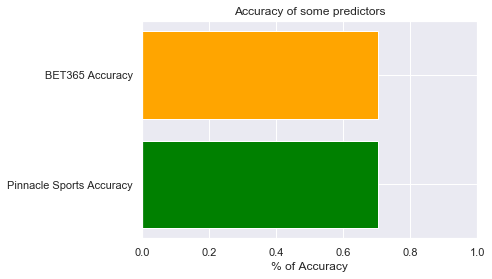

In [138]:
fig, ax = plt.subplots()

accuracies = ('BET365 Accuracy', 'Pinnacle Sports Accuracy')
y_pos = np.arange(len(accuracies))

ax.barh(y_pos, width = [b365_accuracy, ps_accuracy], color = ['orange', 'green'])
ax.set_yticks(y_pos)
ax.set_yticklabels(accuracies)
ax.invert_yaxis()
ax.set_xlabel('% of Accuracy')
ax.set_title('Accuracy of some predictors')
ax.set_xlim((0,1))

plt.show()

Scale the data

In [139]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression (dafault params)

In [142]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
y_pred = model.predict(X_test)

In [154]:
logreg_accuracy = accuracy_score(y_test, y_pred, normalize=True)
logreg_accuracy

0.6797085806799784

#### Decision Tree (dafault params)

In [153]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train,y_train)
tree_accuracy = accuracy_score(Tree.predict(X_test), y_test)
tree_accuracy

0.5825688073394495

#### Naive Bayes (dafault params)

In [152]:
Bayes = MultinomialNB()
Bayes.fit(X_train,y_train)
bayes_accuracy = accuracy_score(Bayes.predict(X_test), y_test)
bayes_accuracy

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6270912034538586

### Comparing models with default params

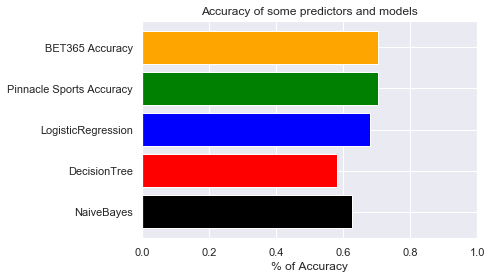

In [155]:
fig, ax = plt.subplots()

accuracies = ('BET365 Accuracy', 'Pinnacle Sports Accuracy', 'LogisticRegression', 'DecisionTree', 'NaiveBayes')
y_pos = np.arange(len(accuracies))

ax.barh(y_pos, width = [b365_accuracy, ps_accuracy, logreg_accuracy, tree_accuracy, bayes_accuracy], color = ['orange', 'green', 'blue', 'red', 'black'])
ax.set_yticks(y_pos)
ax.set_yticklabels(accuracies)
ax.invert_yaxis()
ax.set_xlabel('% of Accuracy')
ax.set_title('Accuracy of some predictors and models')
ax.set_xlim((0,1))

plt.show()

#### Tuning the model

Let's try to improve our accuracy od predictions by LogisticRegression.

Set some params to try:

In [168]:
params = {'C':[0.1, 1, 10, 100], 'max_iter':[100, 1000]}

In [166]:
LogisticRegression?

In [175]:
gs_logreg = GridSearchCV(estimator=LogisticRegression(solver='liblinear'), param_grid=params, cv=[(slice(None), slice(None))], n_jobs=-1)
gs_logreg.fit(X_train, y_train)

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [176]:
gs_accuracy = accuracy_score(gs_logreg.predict(X_test), y_test)
gs_accuracy

0.6797085806799784

In [177]:
accuracy_df = pd.DataFrame({'predictor':['Pinnacle Sports', 'BET365', 'Tuned Logistic Regression'],'accuracy':[ps_accuracy, b365_accuracy, gs_accuracy]})
accuracy_df

,predictor,accuracy
0,Pinnacle Sports,0.705341
1,BET365,0.704531
2,Tuned Logistic Regression,0.679709


### 6. Summary

Unfortunately, this study did not allow for a better result than the bookmaker's predictions. Perhaps this is due to the fact that they have more information affecting the probability of a match ending. For this reason it seems to be impossible to make regular money on betting on the results of tennis matches.